# Sentiment Analysis Using TextBlob

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
import seaborn as sns
import pandas as pd
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Tatasky Amazon Review sheet.csv')
df.head()

,reviews
0,If you are ready to pay at least 500 Rs. per m...
1,Bad service by tatasky
2,Good purchase
3,Ideal for HD TVs.. Does not have any competiti...
4,Best in dth..


In [2]:
#df.drop_duplicates(subset =”Description”, keep = “first”, inplace = True)
df['reviews'] = df['reviews'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['reviews'].apply(get_polarity)

In [3]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [4]:
df.head()

,reviews,Polarity,Sentiment_Type
0,If you are ready to pay at least 500 Rs. per m...,0.07,POSITIVE
1,Bad service by tatasky,-0.70,NEGATIVE
2,Good purchase,0.70,POSITIVE
3,Ideal for HD TVs.. Does not have any competiti...,0.50,POSITIVE
4,Best in dth..,1.00,POSITIVE


# Sentiment Analysis Using Vader

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import pandas as pd
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Tatasky Amazon Review sheet.csv')
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews
0,If you are ready to pay at least 500 Rs. per m...
1,Bad service by tatasky
2,Good purchase
3,Ideal for HD TVs.. Does not have any competiti...
4,Best in dth..


In [6]:
df['scores'] = df['reviews'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

,reviews,scores
0,If you are ready to pay at least 500 Rs. per m...,"{'neg': 0.047, 'neu': 0.678, 'pos': 0.275, 'co..."
1,Bad service by tatasky,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp..."
2,Good purchase,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
3,Ideal for HD TVs.. Does not have any competiti...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
4,Best in dth..,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."


In [7]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [8]:
df.head()

,reviews,scores,compound,sentiment_type
0,If you are ready to pay at least 500 Rs. per m...,"{'neg': 0.047, 'neu': 0.678, 'pos': 0.275, 'co...",0.7717,POSITIVE
1,Bad service by tatasky,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.5423,NEGATIVE
2,Good purchase,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,POSITIVE
3,Ideal for HD TVs.. Does not have any competiti...,"{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...",0.5267,POSITIVE
4,Best in dth..,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,POSITIVE


In [9]:
index = df.index
count = len(index)
print(count)

7043


<AxesSubplot:title={'center':'sentiment analysis'}>

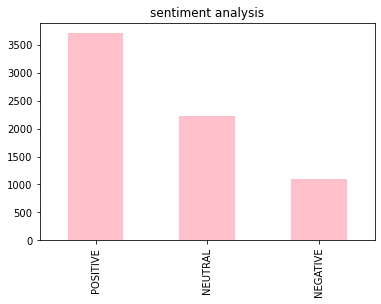

In [10]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis", color='pink')

In [11]:
df.to_csv('Tatasky Amazon Review sheet_Scores.csv')

In [12]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 386F-6856

 Directory of C:\Users\admin

05/24/2021  11:21 PM           861,056 ECenter Dataset.csv
05/26/2021  03:13 PM         1,324,814 Tatasky Amazon Review sheet_Scores.csv
               2 File(s)      2,185,870 bytes
               0 Dir(s)  48,176,640,000 bytes free
